<h3> <img width=400, height=400 src="datasets\\iris.png" /> </h3>

<h2>Flowers Classification using Iris dataset</h2>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
from sklearn.datasets import load_iris

iris = load_iris(as_frame=True)

In [10]:
df = iris.frame
print(df.shape)
df.head()

(150, 5)


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [11]:
df['target'].value_counts()

target
0    50
1    50
2    50
Name: count, dtype: int64

In [16]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [17]:
df["target_name"] = df["target"].map({0:"setosa", 1:"versicolor", 2:"'virginica'"})
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,target_name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


### Data Vizualization and Exploration

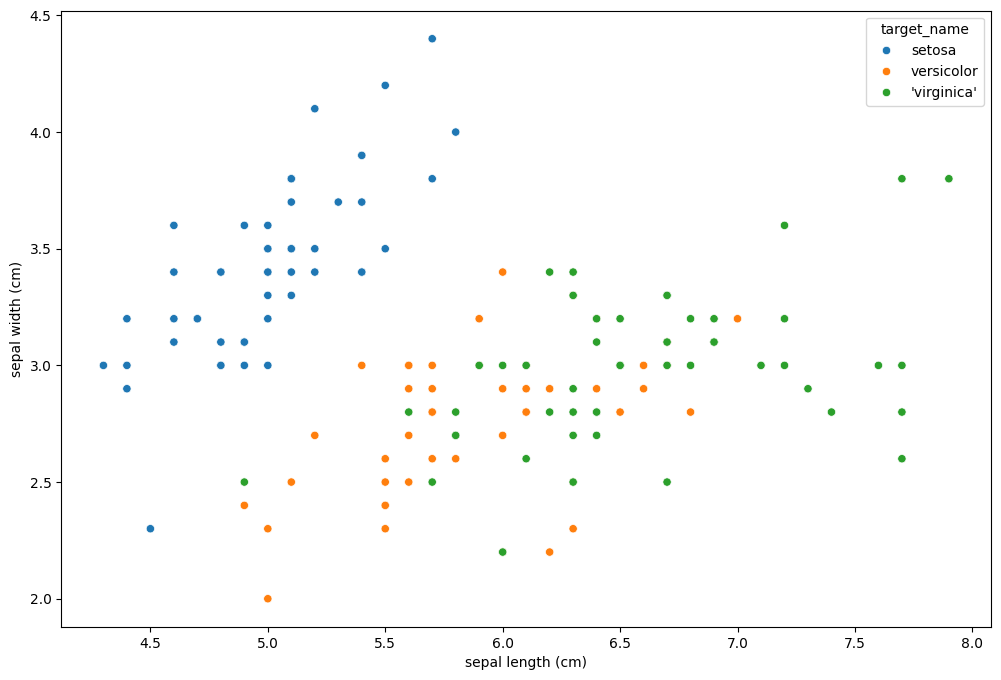

In [18]:
plt.figure(figsize=(12,8))
sns.scatterplot(df, x="sepal length (cm)", y="sepal width (cm)", hue="target_name")
plt.show()

### Model Training

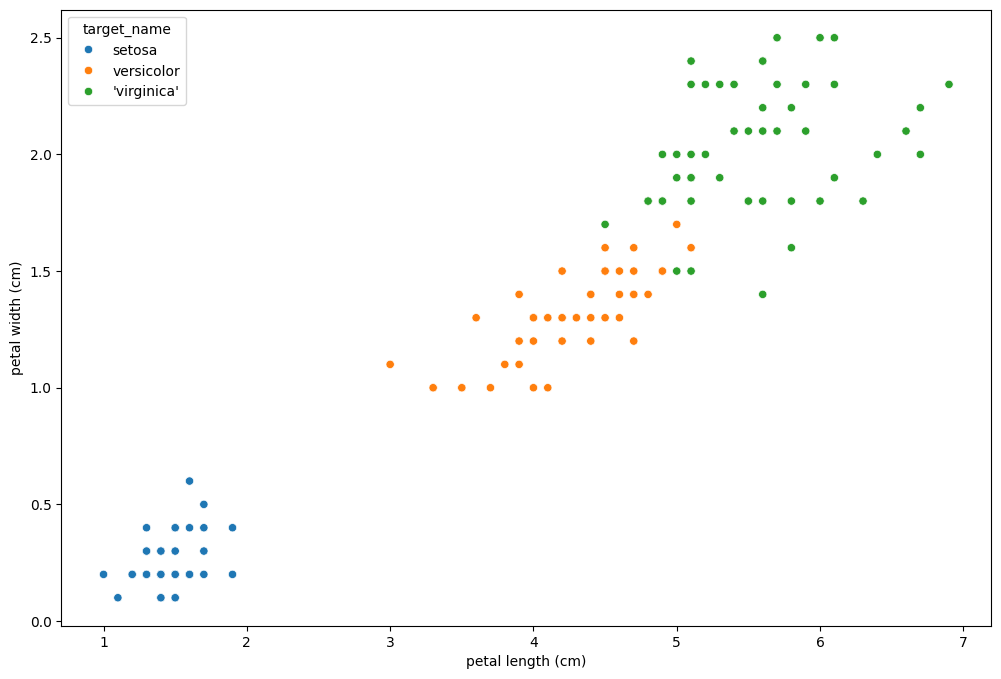

In [19]:
plt.figure(figsize=(12,8))
sns.scatterplot(df, x="petal length (cm)", y="petal width (cm)", hue="target_name")
plt.show()

In [22]:
X = df[['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']]
y = df["target"]

In [23]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=42)

model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

### Model Evaluation

In [24]:
model.score(X_test, y_test)

1.0

In [26]:
y_pred = model.predict(X_test)
y_pred

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 1, 0, 0, 2, 1, 0, 0, 0, 2, 1, 1, 0,
       0])

In [ ]:
model.score(X_train, y_train)

0.9619047619047619

In [34]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

acc_score = accuracy_score(y_pred=y_pred, y_true=y_test)
acc_score

1.0

### Model Evaluation: Precision, Recall, F1 Score

In [35]:
c_report = classification_report(y_pred=y_pred, y_true=y_test)
print(c_report)
conf_matrix = confusion_matrix(y_pred=y_pred, y_true=y_test)
print(conf_matrix)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45

[[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]


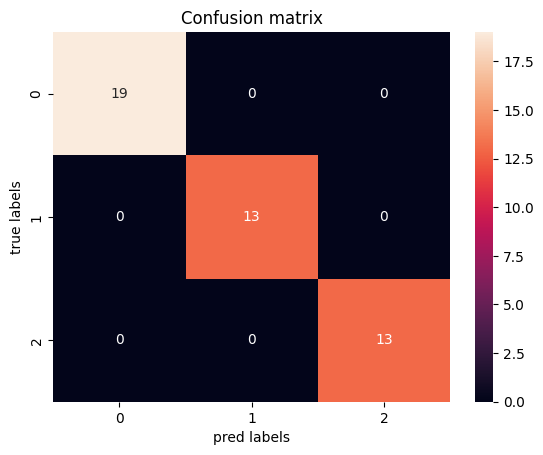

In [36]:
sns.heatmap(conf_matrix, annot=True)
plt.xlabel("pred labels")
plt.ylabel('true labels')
plt.title('Confusion matrix')
plt.show()